In [ ]:
!pip install grad-cam

In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# # 加载预训练的ResNet模型
# model = models.wide_resnet50_2(pretrained=True).to(device)
# model.eval()  # 设置模型为评估模式
# # print(model.layer4[-1])

In [4]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [5]:
image_path = "./cam_img/000.JPG" # img_path
img = Image.open(image_path).convert('RGB')
img = img.resize((224, 224))
input_tensor = transform(img).unsqueeze(0).to(device)  # 增加batch维度
img = np.array(img).astype(np.float32) / 255.0


/home/lxj/.conda/envs/vmamba/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/lxj/.conda/envs/vmamba/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Wide_ResNet50_2_Weights.IMAGENET1K_V1`. You can also use `weights=Wide_ResNet50_2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


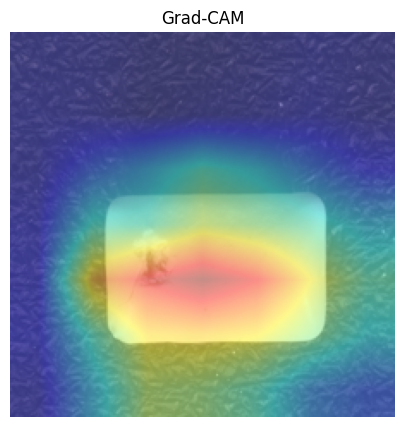

In [ ]:

# init model
model = models.wide_resnet50_2(pretrained=True).to(device)
model.eval()  

# 目标层
target_layers = [model.layer4[-1]]

# 创建目标类别
# targets = [ClassifierOutputTarget(224)]  # 请根据实际需要更改类别索引

# 使用Grad-CAM生成CAM
with GradCAM(model=model, target_layers=target_layers) as cam:
    grayscale_cam = cam(input_tensor=input_tensor)
    grayscale_cam = grayscale_cam[0, :]  # 取出第一个图像的CAM
    visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)

# 显示结果

plt.figure(figsize=(5, 5))

# # 显示原始图像
# plt.subplot(1, 2, 1)
# plt.imshow(img)
# # plt.title('Original Image')
# plt.axis('off')

# # 显示CAM可视化图像
# plt.subplot(1, 2, 2)
plt.imshow(visualization, cmap='jet', alpha=0.8)  # 使用jet colormap

plt.title('Grad-CAM')

plt.axis('off')
# plt.colorbar()
plt.show()